# An investigation into the life expectancy of smokers:

### Aim:

***

The aim of this project is to investigate the habits of smokers and thus the effects of smoking on the national population of smokers in Ireland. The hope is to isolate the factors that most affect the outcome for a given case, and to generate an algorithm that can best emulate a small sample of the real-life population.

***

### Investigation:

***

Initially I begun my investigation into the matter based upon certain assumptions that I would then either prove right, wrong, or refine.

I decided that the most interesting variable in relation to this data was (L): the life expectancy of a given smoker; thus, the task was to find a way of calculating an average life expectancy for a given smoker.

I assumed that the main factors that would affect a smoker’s life expectancy would be (A): Number of cigarettes smoked a day (average), (B): Age that the person started and (C): If they gave up, and if so, at what age.

Firstly, I just needed to gather up as much raw information as I could so as to formulate a better understanding of the effects of smoking on the general population as a whole. What I found was the following information:

Smoking is the second most prevalent cause of death in the world, succeeded only by high blood pressure. [17]

According to ‘Our World in Data’, “Every seventh death in the world (13%) was the result of direct smoking in 2017; a further 2% was the result of second-hand smoke. This means 15% – close to 1-in-6 deaths was the result of tobacco”.

***

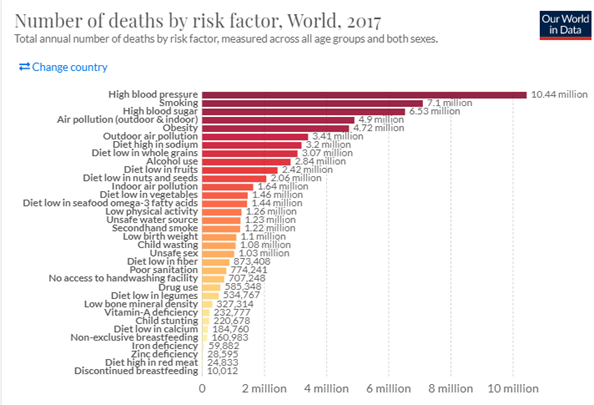

***

With China and Greenland seemingly having the worst rates of deaths from smoking in the world, with almost 1 in 4 deaths being related to smoking. [17]

***

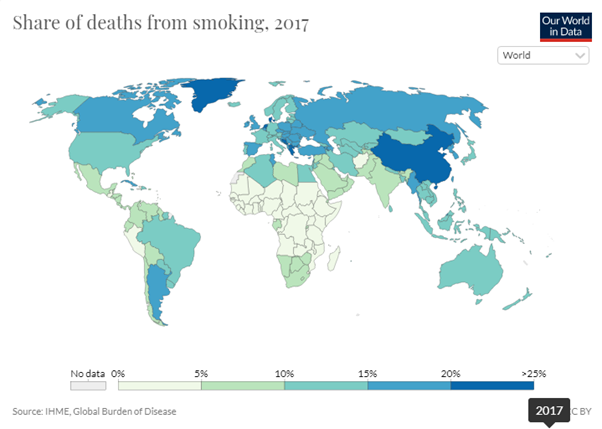

***

Most smoking related deaths affect people in their later years of life:

***

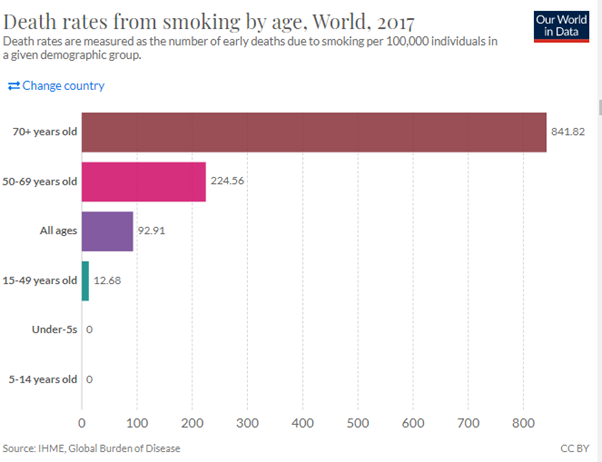

***

And thus, here we are already beginning to see some sort of visualisation of the outcome variable (L) and how it should look if replicated.

***

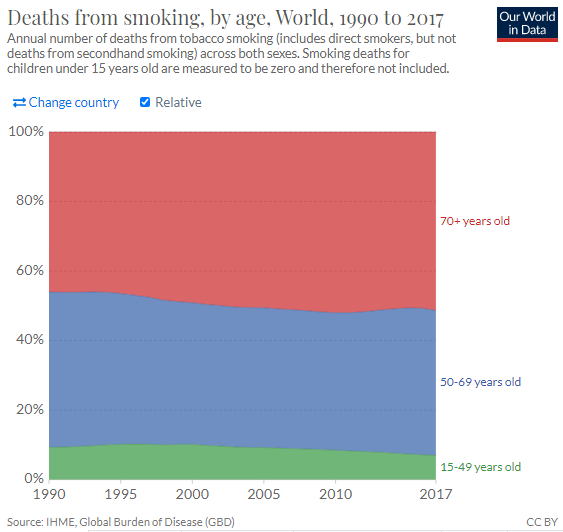